In [1]:
import os 
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from PIL import Image, ImageDraw

import torch
from torch import nn
import torchvision
from torch.nn import functional as F

import matplotlib.pyplot as plt

from utils.data import WoofDataset
from utils.train import classic_train

from torch.utils.data import DataLoader

In [2]:
torch.manual_seed(88)
np.random.seed(88)

device =  torch.device(('cuda:0' if torch.cuda.is_available() else 'cpu'))  # включаем поддержку GPU
device

device(type='cuda', index=0)

In [3]:
train_set = WoofDataset('data/imagewoof2/train', (256, 256))
val_set = WoofDataset('data/imagewoof2/val', (256, 256))

In [5]:
val_set.csv

,path,class
0,data/imagewoof2/val/n02093754/n02093754_1340.JPEG,4
1,data/imagewoof2/val/n02093754/n02093754_4192.JPEG,4
2,data/imagewoof2/val/n02093754/n02093754_5522.JPEG,4
3,data/imagewoof2/val/n02093754/n02093754_6760.JPEG,4
4,data/imagewoof2/val/n02093754/n02093754_1851.JPEG,4
...,...,...
3924,data/imagewoof2/val/n02111889/n02111889_1020.JPEG,8
3925,data/imagewoof2/val/n02111889/n02111889_5532.JPEG,8
3926,data/imagewoof2/val/n02111889/n02111889_4470.JPEG,8
3927,data/imagewoof2/val/n02111889/n02111889_3480.JPEG,8


In [24]:
BATCH_SIZE = 50
NUM_WORKERS = 4
NAME_TEST = 'classic_resnet18'
NUM_TEST = 0

if not os.path.isdir('weights/' + NAME_TEST):
    os.mkdir('weights/' + NAME_TEST)

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

In [25]:
net = torchvision.models.resnet18(pretrained=True)
net.fc = nn.Linear(512, 10)

net = net.to(device)

In [26]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.0001, amsgrad=True)

In [27]:
result = classic_train(net, 181, device, loss_fn, optimizer, train_loader, val_loader, num_epoch=10, NUM_TEST=NUM_TEST, NAME_TEST=NAME_TEST, begin=0)

-- EPOCH 0 ---------------------


  0%|          | 0/181 [00:00<?, ?it/s]

Validating...


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Epoch 0 Iteration 0 
Train loss = nan 
Val loss = 2.554213842259178 
Accuracy = 0.17358106388393993 
F-score = 0.0924722557519154 

-- EPOCH 1 ---------------------


  0%|          | 0/181 [00:00<?, ?it/s]

Validating...
Epoch 1 Iteration 181 
Train loss = 0.4755676072605407 
Val loss = 0.26625177405680284 
Accuracy = 0.9139730211249681 
F-score = 0.9134471160600843 

-- EPOCH 2 ---------------------


  0%|          | 0/181 [00:00<?, ?it/s]

Validating...
Epoch 2 Iteration 362 
Train loss = 0.1098932715246032 
Val loss = 0.29495030587326876 
Accuracy = 0.9020106897429372 
F-score = 0.9026760805396176 

-- EPOCH 3 ---------------------


  0%|          | 0/181 [00:00<?, ?it/s]

Validating...
Epoch 3 Iteration 543 
Train loss = 0.032715177279253854 
Val loss = 0.2588074711516877 
Accuracy = 0.9236446933061848 
F-score = 0.9226586482625074 

-- EPOCH 4 ---------------------


  0%|          | 0/181 [00:00<?, ?it/s]

Validating...
Epoch 4 Iteration 724 
Train loss = 0.013197103059896942 
Val loss = 0.24425798208936106 
Accuracy = 0.9256808348180199 
F-score = 0.9254583147548989 

-- EPOCH 5 ---------------------


  0%|          | 0/181 [00:00<?, ?it/s]

Validating...
Epoch 5 Iteration 905 
Train loss = 0.006237508746466049 
Val loss = 0.23796040324282042 
Accuracy = 0.9305166709086281 
F-score = 0.9300705053201573 

-- EPOCH 6 ---------------------


  0%|          | 0/181 [00:00<?, ?it/s]

Validating...
Epoch 6 Iteration 1086 
Train loss = 0.005103167073121963 
Val loss = 0.250012931802982 
Accuracy = 0.9261898701959786 
F-score = 0.9261086371806074 

-- EPOCH 7 ---------------------


  0%|          | 0/181 [00:00<?, ?it/s]

Validating...
Epoch 7 Iteration 1267 
Train loss = 0.003666370349437081 
Val loss = 0.24391591822422004 
Accuracy = 0.9294986001527106 
F-score = 0.9290813818268946 

-- EPOCH 8 ---------------------


  0%|          | 0/181 [00:00<?, ?it/s]

Validating...
Epoch 8 Iteration 1448 
Train loss = 0.0025706517449657316 
Val loss = 0.248054558588074 
Accuracy = 0.9300076355306693 
F-score = 0.9297096474670649 

-- EPOCH 9 ---------------------


  0%|          | 0/181 [00:00<?, ?it/s]

Validating...
Epoch 9 Iteration 1629 
Train loss = 0.0025546435895118635 
Val loss = 0.2463435040834018 
Accuracy = 0.9256808348180199 
F-score = 0.9255182166001346 



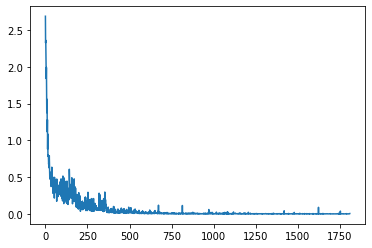

In [29]:
plt.plot(result[0])
plt.title('Train loss')

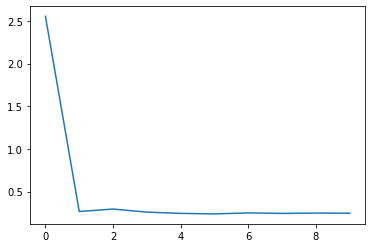

In [30]:
plt.plot(result[1])
plt.title('Test loss')

Text(0.5, 1.0, 'accuracy & f1')

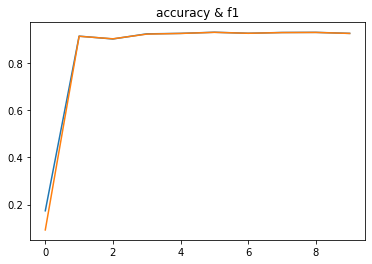

In [32]:
plt.plot(result[2])
plt.plot(result[3])
plt.title('accuracy & f1')

In [39]:
net.load_state_dict(torch.load('weights/classic_resnet18/test-0-epoch-5-iter-905.pth'))  

<All keys matched successfully>

In [40]:
from utils.testing import test_classic

In [41]:
test_classic(net, val_loader, device)


Accuracy = 0.9305166709086281 
F-score = 0.9300705053201573 

